## Mise en place du modèle

### Imports

In [25]:

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE


### 2 Charger le dataset


In [6]:
df_train = pd.read_csv("train.csv")
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


### Encodage et transformation de certaines variables avant modélisation

#### Définir X et y

In [7]:

X = df_train.drop("Exited", axis=1)
y = df_train["Exited"]


#### 4 Split avec Stratification

In [8]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Distribution train :\n", y_train.value_counts())
print("\nDistribution test :\n", y_test.value_counts())


Distribution train :
 Exited
0    104090
1     27937
Name: count, dtype: int64

Distribution test :
 Exited
0    26023
1     6984
Name: count, dtype: int64


#### Application du smote uniquement sur les données d'entrainement

In [17]:

# 1 - Séparation X / y
X = df_train.drop("Exited", axis=1)
y = df_train["Exited"]

# 2 - Colonnes numériques et catégorielles
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()

print("Numériques :", num_cols)
print("Catégorielles :", cat_cols)

# 3 - Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

# 4 - Pipeline complète
model_GB = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("classifier", GradientBoostingClassifier(random_state=42))
])

# 5 - Fit après SMOTE (si SMOTE)
model_GB.fit(X_train, y_train)


C:\Users\HP\AppData\Local\Temp\ipykernel_31656\638295484.py:7: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()


Numériques : ['id', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
Catégorielles : ['Surname', 'Geography', 'Gender']


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocess', ...), ('classifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers

In [18]:
y_predict_train = model_GB.predict(X_train)
y_predict_test = model_GB.predict(X_test)

In [19]:
cm_train = confusion_matrix(y_train, y_predict_train)
cm_train

array([[99370,  4720],
       [12957, 14980]])

In [20]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report

In [21]:
precision_train = precision_score(y_train, y_predict_train)
recall_train = recall_score(y_train, y_predict_train)
accuracy_train = accuracy_score(y_train, y_predict_train)
f1_train = f1_score(y_train, y_predict_train)
print("Accuracy:", accuracy_train)
print("Recall:", recall_train)
print("Precision:", precision_train)
print("F1-score:", f1_train )

Accuracy: 0.8661107197770153
Recall: 0.5362064645452268
Precision: 0.7604060913705584
F1-score: 0.6289228960681823


In [22]:
cm_test = confusion_matrix(y_test, y_predict_test)
cm_test

array([[24858,  1165],
       [ 3284,  3700]])

In [23]:
# Afficher le rapport de classification
print(classification_report(y_train, y_predict_train))
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92    104090
           1       0.76      0.54      0.63     27937

    accuracy                           0.87    132027
   macro avg       0.82      0.75      0.77    132027
weighted avg       0.86      0.87      0.86    132027

              precision    recall  f1-score   support

           0       0.88      0.96      0.92     26023
           1       0.76      0.53      0.62      6984

    accuracy                           0.87     33007
   macro avg       0.82      0.74      0.77     33007
weighted avg       0.86      0.87      0.86     33007



In [24]:
y_pred_proba = model_GB.predict_proba(X_train)[:,1]
# Calculer la courbe ROC et l'AUC
fpr, tpr, threasholds = roc_curve(y_train, y_pred_proba)
roc_auc = auc(fpr, tpr)
roc_auc

0.8906114321982982

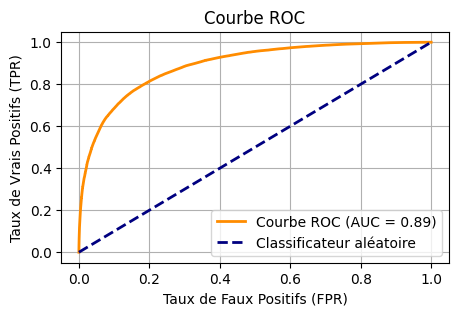

L'AUC (Area Under the Curve) est : 0.89


In [26]:
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"Courbe ROC (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--", label="Classificateur aléatoire")
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.title("Courbe ROC")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
print(f"L'AUC (Area Under the Curve) est : {roc_auc:.2f}")